In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
#Instanciation  et verification du type de notre dataframe
cancer = load_breast_cancer()
type(cancer)

sklearn.utils._bunch.Bunch

In [5]:
# inspectons nos données 
data_cancer = pd.DataFrame(cancer.data,columns = cancer.feature_names)
print(data_cancer.shape)

(569, 30)


In [7]:
data_cancer.columns = [colonne.replace(" ","_") for colonne in data_cancer.columns]
#colonnes = [ncol for ncol in data_cancer.columns]

In [9]:
data_cancer.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [11]:
data_cancer.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


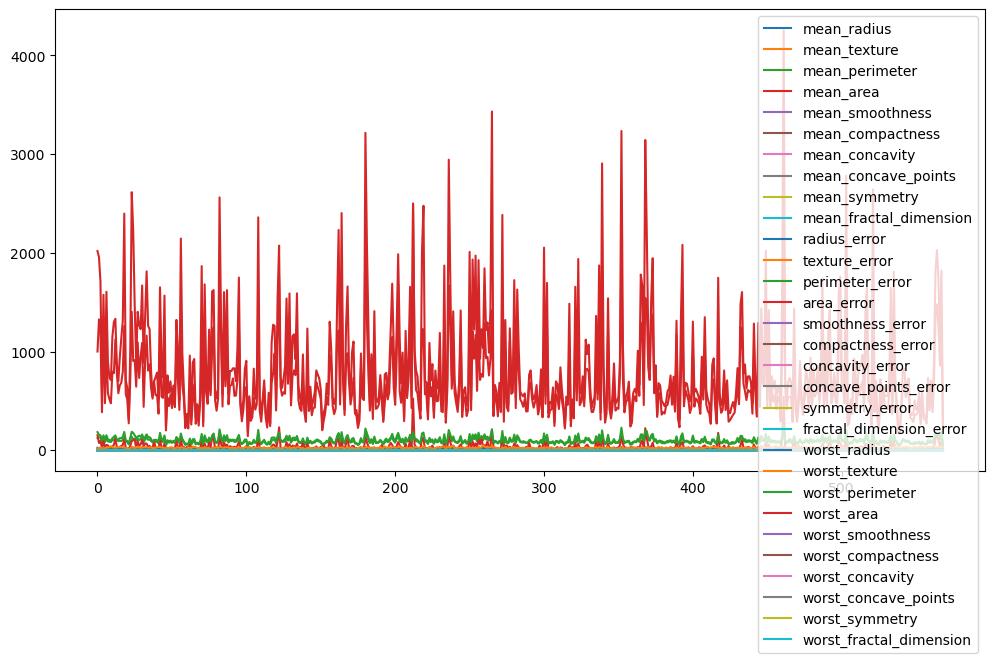

In [13]:
# On peut vouloir voir comment nos variables se plottent
plt.figure(figsize = (12,6))
plt.plot(data_cancer, label=data_cancer.columns)
plt.legend()
plt.show()

## Premiere analyse descriptive
    On remarque avec aisance que les features comportants area ont une echelle beaucoup plus supperieur aux autres features pour cela 
    il nous sera indispensable de standardiser les données 
On va voir les types de données avec lequelles nous avons affaire

In [16]:
#Valeurs manquantes
data_cancer.isnull().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [18]:
#Petit resumer statistique de nos données
data_cancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Une de mes strategie a moi pour facilement reperer les valeurs aberrantes consite a regarder la diffference significative entre la moyenne et la medine 
puisque dans une distribution normale la moyenne et la mediane ont les mêmes valeurs. Si je constate que les valeurs differe alors la distribution n'est pas symetrique et donc forcement il doit y avoir des valeurs aberrantes (notons cela s'applique a de grand jeu de données)

In [21]:
# On peut aussi executer la commande suivante pour inspecter nos données
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

## Determination statistique des outliers
Une facon statistique de trouver les outliers est d'uliser la regle des quartiles
une valeur est consideree comme outlier lorsque sa valeur < Q1 +1.5*IQR ou que sa valeur> Q3 - 1.5*IQR

In [24]:
# On va verifier si j'ai raison a propos des outliers
IQR_worst_area = data_cancer['worst_area'].quantile(0.75) - data_cancer['worst_area'].quantile(0.25)
bas = data_cancer['worst_area'].quantile(0.25) - 1.5*IQR_worst_area
haut = data_cancer['worst_area'].quantile(0.75) + 1.5*IQR_worst_area
print(haut)
print(bas)

1937.0500000000002
-337.7500000000001


In [26]:
data_cancer[data_cancer['worst_area'].values >haut]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
18,19.81,22.15,130.0,1260.0,0.09831,0.10270,0.1479,0.09498,0.1582,0.05395,...,27.32,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615
23,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,0.05278,...,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
24,16.65,21.38,110.0,904.6,0.11210,0.14570,0.1525,0.09170,0.1995,0.06330,...,26.46,31.56,177.0,2215.0,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564
56,19.21,18.57,125.5,1152.0,0.10530,0.12670,0.1323,0.08994,0.1917,0.05961,...,26.14,28.14,170.1,2145.0,0.1624,0.3511,0.3879,0.2091,0.3537,0.08294
82,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,0.07039,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,0.06877,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
162,19.59,18.15,130.7,1214.0,0.11200,0.16660,0.2508,0.12860,0.2027,0.06082,...,26.73,26.39,174.9,2232.0,0.1438,0.3846,0.6810,0.2247,0.3643,0.09223


In [28]:
# Pareil pour voir les valeurs aberrants bas
data_cancer[data_cancer['worst_area'].values <bas]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension


## Traintement des valeurs aberrantes
Le traitement des valeurs aberrantes depend de l'object d'etude ....

In [31]:
## Inspectons la variable cible
pd.DataFrame(cancer.target).value_counts(normalize =True)

0
1    0.627417
0    0.372583
Name: proportion, dtype: float64

In [33]:
# On remarque qu'il y a une disproportion entre les classes. On va essayez de reechantillonner nos données
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(data_cancer,cancer.target, test_size = 0.3,random_state = 10)
X_val,X_test,y_val,y_test =train_test_split(X_test,y_test, test_size = 0.5,random_state = 10)

In [35]:
print(X_train.shape)
print(type(X_train))
type(y_train)

(398, 30)
<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

In [37]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [39]:
X = X_train
X['target'] = y_train
minoritaire = X[X['target'] == 0]
majoritaire = X[X['target'] == 1]
minorite_up = resample(minoritaire, replace = True, n_samples = len(majoritaire))
print(minorite_up.shape)
print(majoritaire.shape)

(245, 31)
(245, 31)


In [41]:
data_sampled = pd.concat([majoritaire, minorite_up])

In [43]:
X_trainS = data_sampled.drop('target', axis = 1)
y_trainS = data_sampled['target']

In [45]:
print(X_trainS.shape)
print(y_trainS.shape)

(490, 30)
(490,)


Mon nouveau jeu d'entrainement est X__trainS parceque le nombre d'echantillon a augmenté

    Nous allons ensuite passer a la feature selection puisque le nombre de feature que nous avons est egale a 30 et dans mon cas je voudrais eliminer les variable qui ne pèsent pas trop d'importance 

In [48]:
from sklearn.feature_selection import SelectFromModel,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_trainSc = scale.fit_transform(X_trainS)
X_trainS_frame = pd.DataFrame(X_trainSc, columns = X_trainS.columns)
LR = LogisticRegression(random_state = 11)#class_weight = 'balanced' si j'avais pas rechantilloner les classes
lsvc = LinearSVC(random_state = 10,dual = 'auto', max_iter = 700,class_weight = 'balanced')
selecteur1 = SelectFromModel(lsvc, threshold ="mean")
selecteur2 = RFE(LR, n_features_to_select = 15,step = 1)
selecteur1.fit(X_trainS_frame,y_trainS)
selecteur2.fit(X_trainS_frame,y_trainS) 

RFE(estimator=LogisticRegression(random_state=11), n_features_to_select=15)

In [50]:
print(selecteur1.get_support())
print("+" * 90)
print(selecteur2.support_)

[False False False False False  True  True  True False False  True False
 False  True False  True False  True  True  True  True  True False  True
 False False  True False  True  True]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[False False False False False False  True  True False False  True False
 False  True False  True False  True  True  True  True  True  True  True
 False False  True  True  True False]


In [52]:
(data_cancer.columns)[selecteur1.get_support()]

Index(['mean_compactness', 'mean_concavity', 'mean_concave_points',
       'radius_error', 'area_error', 'compactness_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_area', 'worst_concavity',
       'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [54]:
print("+" * 90)
(data_cancer.columns)[selecteur2.support_]

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Index(['mean_concavity', 'mean_concave_points', 'radius_error', 'area_error',
       'compactness_error', 'concave_points_error', 'symmetry_error',
       'fractal_dimension_error', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry'],
      dtype='object')

In [56]:
X_train_frame1=pd.DataFrame(data = X_trainS, columns = data_cancer.columns)[['mean_compactness', 'mean_concavity', 'mean_concave_points',
       'radius_error', 'area_error', 'compactness_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_area', 'worst_concavity',
       'worst_symmetry', 'worst_fractal_dimension']]
X_test_frame1=pd.DataFrame(data = X_test, columns = data_cancer.columns)[['mean_compactness', 'mean_concavity', 'mean_concave_points',
       'radius_error', 'area_error', 'compactness_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_area', 'worst_concavity',
       'worst_symmetry', 'worst_fractal_dimension']]
X_val_frame1=pd.DataFrame(data = X_val, columns = data_cancer.columns)[['mean_compactness', 'mean_concavity', 'mean_concave_points',
       'radius_error', 'area_error', 'compactness_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_area', 'worst_concavity',
       'worst_symmetry', 'worst_fractal_dimension']]

In [58]:
print(X_train_frame1.shape)
print(X_test_frame1.shape)
print(X_val_frame1.shape)

(490, 15)
(86, 15)
(85, 15)


In [60]:
X_train_frame2 = pd.DataFrame(data = X_trainS, columns = data_cancer.columns)[['mean_concavity', 'mean_concave_points', 'radius_error', 'area_error',
       'compactness_error', 'concave_points_error', 'symmetry_error',
       'fractal_dimension_error', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry']]
X_test_frame2 = pd.DataFrame(data = X_test, columns = data_cancer.columns)[['mean_concavity', 'mean_concave_points', 'radius_error', 'area_error',
       'compactness_error', 'concave_points_error', 'symmetry_error',
       'fractal_dimension_error', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry']]
X_val_frame2 = pd.DataFrame(data = X_val, columns = data_cancer.columns)[['mean_concavity', 'mean_concave_points', 'radius_error', 'area_error',
       'compactness_error', 'concave_points_error', 'symmetry_error',
       'fractal_dimension_error', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry']]

In [62]:
print(X_train_frame2.shape)
print(X_test_frame2.shape)
print(X_val_frame2.shape)

(490, 15)
(86, 15)
(85, 15)


In [64]:
print(y_train.shape)
print(y_trainS.shape)

(398,)
(490,)


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
SVC = SVC(random_state = 100)
SVC_hyp = {'kernel':['linear', 'rbf'],
          'C':[0.01,0.1,1,10,20,50,100]}
SVC_CV = GridSearchCV(SVC, SVC_hyp, cv = 5)
"""pipe_RFC = Pipeline ([
    ('scale', StandardScaler()),
    ('RFC_CV', GridSearchCV(RFC, RFC_hyp, cv = 5))
])
pipe_RFC.fit(X_train_frame2,y_trainS)
print(pipe_RFC[1].best_score_)
print("+" * 90)
print(pipe_RFC[1].best_estimator_)"""
SVC_CV.fit(X_train_frame1,y_trainS)
print(SVC_CV.best_score_)
print("+" * 90)
print(SVC_CV.best_estimator_)

0.9673469387755101
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
SVC(C=100, kernel='linear', random_state=100)


In [70]:
score =  SVC_CV.best_estimator_.score(X_val_frame1, y_val)
pred_SVC = SVC_CV.best_estimator_.predict(X_val_frame1)
print(X_val_frame1.shape)
print(pred_SVC.shape)
print(f"le score de la RFC sur le jeu de test est: {score}")

(85, 15)
(85,)
le score de la RFC sur le jeu de test est: 0.9764705882352941


In [72]:
from sklearn.model_selection import cross_val_score, KFold
crossv = KFold(shuffle =True,n_splits =5,random_state = 10)
scoreSVC_cv = cross_val_score(SVC_CV.best_estimator_, X_val_frame1,y_val, cv = crossv)
print(f"LA moyenne de la cross validation a donnée: {scoreSVC_cv.mean()}")

LA moyenne de la cross validation a donnée: 0.9647058823529411


In [74]:
from sklearn.ensemble import BaggingClassifier
bagC = BaggingClassifier(random_state = 100)
bagC_hyp ={'n_estimators':[5, 10, 15, 20, 50, 100,200]}
bagC_CV = GridSearchCV(bagC, bagC_hyp, cv = 5)
bagC_CV.fit(X_train_frame1,y_trainS)
print(bagC_CV.best_score_)
print("+" * 90)
print(bagC_CV.best_estimator_)

0.9693877551020409
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
BaggingClassifier(n_estimators=15, random_state=100)


In [76]:
scoreBC = bagC_CV.best_estimator_.score(X_val_frame1,y_val)
print(f"le score sur le jeu de validation: {scoreBC}")

le score sur le jeu de validation: 0.9411764705882353


In [78]:
scoreBC_cv = cross_val_score(bagC_CV.best_estimator_,X_val_frame1,y_val, cv = crossv)
print(scoreBC_cv.mean())

0.9647058823529411


In [84]:
MLPC = MLPClassifier(random_state = 10,max_iter =2000)
MLPC_hyp = {'hidden_layer_sizes': [(50,),(100,),(200,)],
           'activation':['identity','logistic','tanh','relu'],
           'solver':['lbfgs','sgd','adam'],
           'learning_rate':['constant','invscaling','adaptive']}
X_trainScale = scale.fit_transform(X_train_frame1)
X_trainScale = pd.DataFrame(data = X_trainScale, columns = X_train_frame1.columns)
MLPC_CV = GridSearchCV(MLPC, MLPC_hyp, cv= 5)
MLPC_CV.fit(X_trainScale,y_trainS)
print(MLPC_CV.best_score_)
print("+" * 90)
print(MLPC_CV.best_estimator_)

0.9816326530612244
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
MLPClassifier(activation='logistic', max_iter=2000, random_state=10)


In [86]:
X_val_frame11 = scale.transform(X_val_frame1)
X_val_frame_neural = pd.DataFrame(data = X_val_frame11, columns = X_val_frame1.columns)
scoreMLPC = MLPC_CV.best_estimator_.score(X_val_frame_neural,y_val)
print(scoreMLPC)

0.9647058823529412


In [88]:
from sklearn.metrics import classification_report,confusion_matrix
pred2 = MLPC_CV.best_estimator_.predict(X_val_frame_neural)
print(classification_report(y_val,pred2))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       1.00      0.95      0.97        58

    accuracy                           0.96        85
   macro avg       0.95      0.97      0.96        85
weighted avg       0.97      0.96      0.97        85



In [92]:
print(classification_report(y_val,pred_SVC,target_names = cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.93      1.00      0.96        27
      benign       1.00      0.97      0.98        58

    accuracy                           0.98        85
   macro avg       0.97      0.98      0.97        85
weighted avg       0.98      0.98      0.98        85



In [94]:
pred_BC = bagC_CV.best_estimator_.predict(X_val_frame1)
print(classification_report(y_val,pred_BC,target_names = cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.87      0.96      0.91        27
      benign       0.98      0.93      0.96        58

    accuracy                           0.94        85
   macro avg       0.92      0.95      0.93        85
weighted avg       0.95      0.94      0.94        85



In [98]:
score_test = SVC_CV.best_estimator_.score(X_test_frame1,y_test)
print(score_test)

0.9534883720930233


In [102]:
y_pred_test = SVC_CV.best_estimator_.predict(X_test_frame1)

In [104]:
print(confusion_matrix(y_test,y_pred_test))

[[30  2]
 [ 2 52]]


In [108]:
from joblib import dump,load
dump(SVC_CV.best_estimator_,'monModel.joblib')

['monModel.joblib']